In [15]:
import numpy as np
import pandas as pd

In [16]:
dados = pd.read_csv('data.csv', sep=';')
dados.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<ipython-input-17-709e3270c8e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if dados.ApplicationMode[a] in [1, 2, 10, 17, 18]: dados.ApplicationMode[a] = 0 #Entrada normal
<ipython-input-17-709e3270c8e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif dados.ApplicationMode[a] in [5, 15, 16, 26]: dados.ApplicationMode[a] = 1 #Entrada especial
<ipython-input-17-709e3270c8e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  el

array([[<Axes: title={'center': 'Dropout'}>,
        <Axes: title={'center': 'Enrolled'}>],
       [<Axes: title={'center': 'Graduate'}>, <Axes: >]], dtype=object)

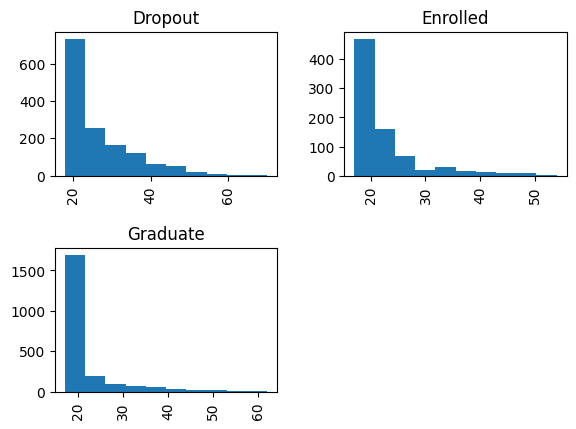

In [17]:
dados.rename(columns = {'Application mode':'ApplicationMode'}, inplace = True)
dados.rename(columns = {'Previous qualification':'PreviousQualification'}, inplace = True)
dados.rename(columns = {'Age at enrollment':'EnrollmentAge'}, inplace = True)
# Agrupando dados para melhorar o CategoricalNB
for a in range(4424):
  #Modo de entrada
  if dados.ApplicationMode[a] in [1, 2, 10, 17, 18]: dados.ApplicationMode[a] = 0 #Entrada normal
  elif dados.ApplicationMode[a] in [5, 15, 16, 26]: dados.ApplicationMode[a] = 1 #Entrada especial
  elif dados.ApplicationMode[a] in [27, 42, 43, 51, 57]: dados.ApplicationMode[a] = 2 #Mudança de curso/Transferência
  else: dados.ApplicationMode[a] = 3 #Já tem diploma
  #Previous education
  if dados.PreviousQualification[a] in [2, 3, 4, 5, 6, 39, 40, 42, 43]: dados.PreviousQualification[a] = 0 #Ensino superior
  elif dados.PreviousQualification[a] in [9, 10, 12, 14, 15]: dados.PreviousQualification[a] = 2 #Ensino médio incompleto
  elif dados.PreviousQualification[a] != 1: dados.PreviousQualification[a] = 3 #Fundamental incompleto
  #Age at enrollment
dados.hist(column = 'EnrollmentAge', by = 'Target')

In [18]:
dados.rename(columns = {'Previous qualification (grade)':'PreviousGrade'}, inplace = True)
# Tornando as variáveis "contínuas" em categorias para facilitar o CatergoricalNB
for a in range(4424):
  if dados.PreviousGrade[a] < 111: #Muito ruim
    dados.PreviousGrade[a] = 0
  elif dados.PreviousGrade[a] < 131: #Ruim
    dados.PreviousGrade[a] = 1
  elif dados.PreviousGrade[a] < 151: #Médio
    dados.PreviousGrade[a] = 2
  elif dados.PreviousGrade[a] < 171: #Bom
    dados.PreviousGrade[a] = 3
  else: dados.PreviousGrade[a] = 4 #Muito bom

<ipython-input-18-daed4730d521>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.PreviousGrade[a] = 1
<ipython-input-18-daed4730d521>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.PreviousGrade[a] = 3
<ipython-input-18-daed4730d521>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.PreviousGrade[a] = 0
<ipython-input-18-daed4730d521>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [19]:
dados.rename(columns = {'Curricular units 1st sem (enrolled)':'Enrolled1st'}, inplace = True)
dados.rename(columns = {'Curricular units 1st sem (approved)':'Approved1st'}, inplace = True)
dados.rename(columns = {'Curricular units 2nd sem (enrolled)':'Enrolled2nd'}, inplace = True)
dados.rename(columns = {'Curricular units 2nd sem (approved)':'Approved2nd'}, inplace = True)
# Converter as colunas de matrícula/aprovação dos semestres em uma única coluna de proporção entre elas
for a in range(4424):
  if dados.Enrolled1st[a] == 0: dados.Approved1st[a] = 4 #Não se matriculou
  else:
    ratio1st = dados.Approved1st[a] / dados.Enrolled1st[a]
    if (ratio1st > 0.9) & (ratio1st <= 1): dados.Approved1st[a] = 0 #Excelente desempenho
    elif (ratio1st > 0.7) & (ratio1st <= 0.9): dados.Approved1st[a] = 1 #Bom desempenho
    elif (ratio1st > 0.5) & (ratio1st <= 0.7): dados.Approved1st[a] = 2
    else: dados.Approved1st[a] = 3 #Mal desempenho
  if dados.Enrolled2nd[a] == 0: dados.Approved2nd[a] = 4 #Não se matriculou
  else:
    ratio2nd = dados.Approved2nd[a] / dados.Enrolled2nd[a]
    if (ratio2nd > 0.9) & (ratio2nd <= 1): dados.Approved2nd[a] = 0 #Excelente desempenho
    elif (ratio2nd > 0.7) & (ratio2nd <= 0.9): dados.Approved2nd[a] = 1 #Bom desempenho
    elif (ratio2nd > 0.5) & (ratio2nd <= 0.7): dados.Approved2nd[a] = 2 #Médio desempenho
    else: dados.Approved2nd[a] = 3 #Mal desempenho
dados.rename(columns = {'Approved1st':'1st semester performance'}, inplace = True)
dados.rename(columns = {'Approved2nd':'2nd semester performance'}, inplace = True)
dados.drop(['Enrolled1st', 'Enrolled2nd'], inplace = True, axis = 1)
dados.head()

<ipython-input-19-479208742204>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if dados.Enrolled1st[a] == 0: dados.Approved1st[a] = 4 #Não se matriculou
<ipython-input-19-479208742204>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if dados.Enrolled2nd[a] == 0: dados.Approved2nd[a] = 4 #Não se matriculou
<ipython-input-19-479208742204>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (ratio1st > 0.9) & (ratio1st <= 1): dados.A

,Marital status,ApplicationMode,Application order,Course,Daytime/evening attendance\t,PreviousQualification,PreviousGrade,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (evaluations),2nd semester performance,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,0,5,171,1,1,1.0,1,19,12,...,0,0,0,4,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,9254,1,1,3.0,1,1,3,...,0,0,6,0,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,0,5,9070,1,1,1.0,1,37,37,...,0,0,0,3,0.000000,0,10.8,1.4,1.74,Dropout
3,1,0,2,9773,1,1,1.0,1,38,37,...,0,0,10,1,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,3,1,8014,0,1,0.0,1,37,38,...,0,0,6,0,13.000000,0,13.9,-0.3,0.79,Graduate


array([[<Axes: title={'center': 'Dropout'}>,
        <Axes: title={'center': 'Enrolled'}>],
       [<Axes: title={'center': 'Graduate'}>, <Axes: >]], dtype=object)

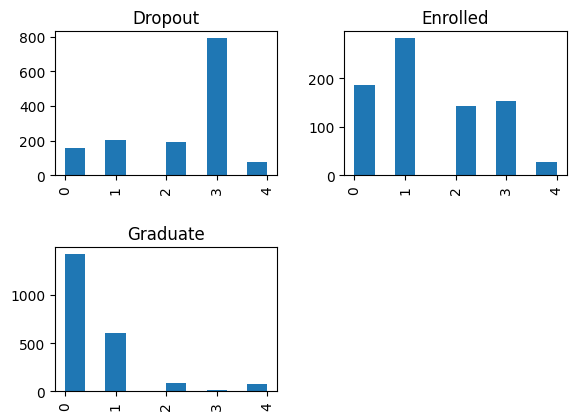

In [20]:
dados.hist(column = '1st semester performance', by = 'Target')

In [21]:
from sklearn.naive_bayes import CategoricalNB
#Aplicando um filtro para manter apenas os atributos desejados
filter = dados[(dados['Target'] != 'Enrolled')]
filter.drop(['Nacionality', 'Marital status', 'Application order', 'Admission grade', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'GDP', 'Displaced', 'Scholarship holder', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Inflation rate', 'Unemployment rate', 'Target'], inplace=True, axis=1)
filter.head(10)

<ipython-input-21-c53953310fc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter.drop(['Nacionality', 'Marital status', 'Application order', 'Admission grade', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'GDP', 'Displaced', 'Scholarship holder', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Inflation rate', 'Unemployment rate', 'Target'], inplace=True, axis=1)


,ApplicationMode,Course,Daytime/evening attendance\t,PreviousQualification,PreviousGrade,Educational special needs,Debtor,Tuition fees up to date,Gender,EnrollmentAge,1st semester performance,2nd semester performance
0,0,171,1,1,1.0,0,0,1,1,20,4,4
1,1,9254,1,1,3.0,0,0,0,1,19,0,0
2,0,9070,1,1,1.0,0,0,0,1,19,3,3
3,0,9773,1,1,1.0,0,0,1,0,20,0,1
4,3,8014,0,1,0.0,0,0,1,0,45,1,0
5,3,9991,0,3,2.0,0,1,1,1,50,0,0
6,0,9500,1,1,2.0,0,0,1,0,18,0,0
7,0,9254,1,1,1.0,0,0,0,1,22,3,3
8,0,9238,1,1,2.0,0,0,1,0,21,0,0
9,0,9238,1,1,2.0,0,1,0,0,18,1,3


In [22]:
filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ApplicationMode              3630 non-null   int64  
 1   Course                       3630 non-null   int64  
 2   Daytime/evening attendance	  3630 non-null   int64  
 3   PreviousQualification        3630 non-null   int64  
 4   PreviousGrade                3630 non-null   float64
 5   Educational special needs    3630 non-null   int64  
 6   Debtor                       3630 non-null   int64  
 7   Tuition fees up to date      3630 non-null   int64  
 8   Gender                       3630 non-null   int64  
 9   EnrollmentAge                3630 non-null   int64  
 10  1st semester performance     3630 non-null   int64  
 11  2nd semester performance     3630 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 368.7 KB


In [23]:
Y = dados.loc[dados['Target'] != 'Enrolled', 'Target']
Y.head(10)

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
5    Graduate
6    Graduate
7     Dropout
8    Graduate
9     Dropout
Name: Target, dtype: object

In [24]:
model = CategoricalNB()
model.fit(filter, Y)
pred_classes = model.predict(filter)
print(pred_classes[0:10])

['Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate' 'Dropout'
 'Graduate' 'Dropout' 'Graduate' 'Dropout']


In [25]:
acc_train = model.score(filter, Y)
print(acc_train)

0.9016528925619834


0.8647010195646183 Antes da conversão

0.884573002754821 Após a conversão

0.8947658402203856 Após a conversão melhorada

A acurácia é de aproximadamente 75% quando não levamos em consideração o desempenho do aluno: é difícil definir sucesso acadêmico por fatores externos.